#0. 통계검정

- normality test

In [ ]:
from scipy import stats # t-분포에서 임의의 표본 생성
sample = stats.t.rvs(10, loc=0, scale=1, size=100)
sample

array([ 0.51494639,  0.34041795, -0.74458429,  1.96453704, -0.70689879,
       -0.92513935,  0.5407774 ,  0.47002345, -0.74434913, -0.68564468,
       -0.04968408, -2.18634388, -1.31913448,  0.22664481,  0.96316048,
        0.89862561, -1.55759082,  0.34798346,  1.03954323,  0.10568735,
       -0.98447299, -2.6278965 ,  0.99084447,  0.06298216, -0.55568317,
       -0.36865893,  0.56388311,  0.38438077,  1.69020708, -1.25822358,
        0.98513144, -0.67544818,  0.29645869,  0.4189929 ,  0.91042113,
       -0.55744728, -0.35399014, -1.37842148,  0.25005632, -0.90160399,
        0.40562069, -0.47741688, -2.71066353,  0.99259258, -0.20880897,
       -0.58196392, -1.22167812,  0.8823911 , -1.74305199, -1.67555334,
       -0.05395884, -0.75020741,  0.09311418, -0.34392672,  0.43166426,
       -1.77486963,  1.49494352, -0.31225478,  0.49312944, -0.93167429,
       -0.50392813,  0.60592495,  0.9020952 ,  0.3379181 ,  0.44763661,
       -0.1327476 , -0.4901687 ,  0.33157256, -0.28334514, -0.58

In [ ]:
stats.shapiro(sample) # Shapiro-Wilk Test, p-value>5% -> 정규성

ShapiroResult(statistic=np.float64(0.9873544564972868), pvalue=np.float64(0.4618933086233599))

In [ ]:
import numpy as np

# 예제 데이터
data = np.random.normal(loc=0, scale=1, size=100)
stats.shapiro(data) # Shapiro-Wilk Test


ShapiroResult(statistic=np.float64(0.980241241106677), pvalue=np.float64(0.1388043306863968))

- 두 집단 모평균 비교

In [ ]:
from scipy import stats
np.random.seed(0)
x1 = stats.norm(0, 1).rvs(10)	#평균이 0인 정규분포에서 10개 표본
x2 = stats.norm(1, 1).rvs(10)	#평균이 1인 정규분포에서 10개 표분
np.mean(x1), np.mean(x2)	#두 랜덤 샘플의 평균 확인

stats.ttest_ind(x1, x2, equal_var=False)	#두 집단의 모평균이 같다는 귀무가설에 대해 t-검정

TtestResult(statistic=np.float64(-1.6868710732328158), pvalue=np.float64(0.1109445748191088), df=np.float64(16.066334597798647))

- 카이제곱 독립성 검정

Type  | OperatorA |  OperatorB |  OperatorC

Gage1 | 37       |   41       |   44

Gage2 | 35       |   72       |   71

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# 교차 테이블(Contingency table)
data = np.array([[37, 41, 44], [35, 72, 71]])

# 카이제곱 독립성 검정 수행
chi_square, p_value, df, expected = chi2_contingency(data)

#expected는 expected frequency

print( chi_square, p_value, df, expected)

4.606280728713048 0.09994448827721346 2 [[29.28       45.95333333 46.76666667]
 [42.72       67.04666667 68.23333333]]


# 1. 인과분석을 위한 구조방정식(Structural Equation Model)

## 1. 구조방정식 모형 소개

* **구조방정식** **모형**: 직접적인 측정이 어려운 잠재변수(latent variable) 간의 영향관계를 분석하기 위한 통계분석 기법
 * 회귀 분석: 잠재변수를 다룰 수 없음
 * 구조방정식: 잠재변수를 다룰 수 있음
  * 여러 변수 간의 영향관계를 동시에 분석할 수 있음
  * 요인분석(factor analysis)과 회귀분석(regression analysis)의 특성을 결합



 - 구조방정식모델링과 공분산
  * 공분산 행렬(covariance matrix)이 분석의 대상으로, 공분산 행렬과 모델에 의해 예측된 공분산 행렬 간의 차이를 가능한 작게하는 구조방정식모델을 추정하는 방식힘. 이때 추정할 parameter는 구조 계수(structural coefficient), 요인 적재값(factor loading), 공분산(covariance), 구조 오차(structural error), 측정 오차(measurement error) 등

- **구조방정식 구성**
 - 잠재변수를 측정하는 측정모델(measurement model)+ 측정된 잠재변수 간의 인과관계(causal relationshop)를 분석하는 구조모델(structural model)로 구성
 - 측정모델은 확인적 요인분석(Confirmatory Factor Analysis, CFA), 구조모델은 다중회귀분석(multiple regression analysis)을 사용
 - 구조방정식모델은 일반적으로  경로도(path diagram)로 표현

* 잠재변수
  - 외생잠재변수(exogenous latent variable)와 내생잠재변수(endogenous latent variable)로 구분
  - 외생잠재변수: 모델 내의 다른 잠재변수에 영향을 미치는 변수로 모델 내에서 독립변수로서의 역할 수행하며 $\xi$이고
  - 내생잠재변수: 모델 내 외생잠재변수에 의해 직,간접적으로 영향을 받는 변수,  독립 및 종속변수로서의 역할 수행하며 $\eta$로 표시


 * 잠재변수 측정
  - 관측변수에 의해 측정
  - 외생잠재변수를 측정하는 관측변수는 외생관측변수(exogenous observed variable)인 $x$
  - 내생잠재변수를 측정하는 관측변수는 내생관측변수(endogenous observed variable)인 $y$로 표시

<**경로도(path diagram)에서의 요소들**>
1. 구조 계수(structural coefficient) : 잠재변수 간 경로계수
 - 외생잠재변수 $\xi$ ->내생잠재변수$\eta$ : $\gamma$
 - 내생잠재변수 $\eta$->내생잠재변수$\eta$ : $\beta$

2. 요인 적재값(factor loading) : 잠재변수와 측정변수 간 경로계수 $\lambda$
 - 외생잠재변수 $\xi$->외생관측변수 $x$ : $\lambda^x$
 - 내생잠재변수$\eta$->내생관측변수 $y$ : $\lambda^x$

3. 측정 오차(measurement error) : 잠재변수가 관측변수를 완전히 설명하지 못하는 정도
 - $x$의 측정 오차 : $\delta$
 - $y$의 측정 오차 : $\epsilon$

4. 구조 오차(structural error) : 설명되지 않고 남아있는 내생잠재변수의 오차
 - 내생잠재변수$\eta$ 오차: $\zeta$

5. 공분산(covariance)
 - 외생잠재변수 간 공분산 : $\phi$
 - 내생잠재변수 간 공분산 : $\psi$
 - 측정 오차 간 공분산 : $\theta$

- 모형 예1

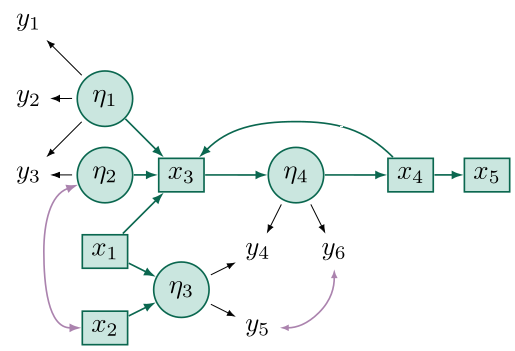

* structural part
 - $\eta_3$ ~ $x_1$ + $x_2$
 - $\eta_4$ ~ $x_3$
 - $x_3$ ~ $\eta_1$ + $eta_2$ + $x_1$ + $x_4$
 - $x_4$ ~ $\eta_4$
 - $x_5$ ~ $x_4$

* measurement part
 - $\eta_1$ =~ $y_1$ + $y_2$ + $y_3$
 - $\eta_2$ =~ $y_3$
 - $\eta_3$ =~ $y_4$ + $y_5$
 - $\eta_4$ =~ $y_4$ + $y_6$

* additional covariances
 - $\eta_2$ ~~   $x_2$
 - $y_5$ ~~   $y_6$

1. 측정 모델: CFA를 수행, 전체 잠재변수가 하나의 모델로 구성된 통합 측정모델(pooled measurement model)을 대상으로 수행한
  - 단일차원성(unidimensionality): 하나의 관측변수는 하나의 잠재변수만을 측정,  단일차원성은 각각의 잠재변수가 단일요인모델(single factor model)에 의해 잘 적합되는지로 평가

2. 구조모형
 - 잠재변수와 잠재변수 간의 관계 분석
 - 연구모델에 의해 설정된 이론적 관계가 데이터에 의해 지지되는지 검토
 - 주로 모델의 적합도 평가, 유의성 검정, 결정계수 등을 평가
 - 가설을 채택하기 위해서는 해당 경로계수가 통계적으로 유의미 해야함. 유의수준이 0.05일 경우 p-value 값이 0.05보다 작아야 하며, 경로계수의 부호가 가설의 방향과 일치하는지 확인.


예: Simple Regression:

*   Independent variable (CI) and one dependent variable (PE)
-   Latent variables
 -  CI: measured by seven observed variables
 -  PE: measured by five observed variables





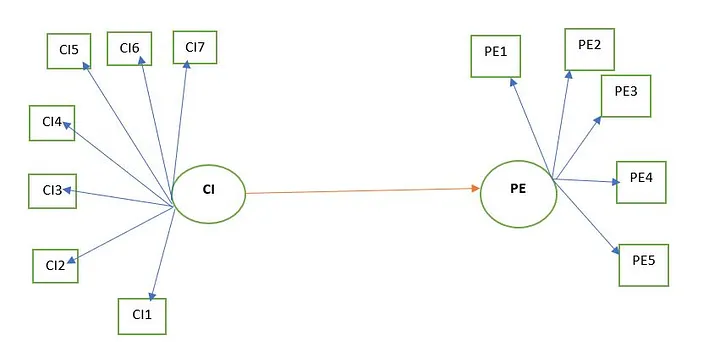

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=c88a1132b974c3faa10ab68ee49e6c95e66d762c2892abd930798b1d628f3615
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


In [2]:
import semopy
import pandas as pd
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [3]:
data = semopy.examples.political_democracy.get_data()
print(data.head())

      y1        y2        y3        y4        y5        y6        y7  \
1   2.50  0.000000  3.333333  0.000000  1.250000  0.000000  3.726360   
2   1.25  0.000000  3.333333  0.000000  6.250000  1.100000  6.666666   
3   7.50  8.800000  9.999998  9.199991  8.750000  8.094061  9.999998   
4   8.90  8.800000  9.999998  9.199991  8.907948  8.127979  9.999998   
5  10.00  3.333333  9.999998  6.666666  7.500000  3.333333  9.999998   

         y8        x1        x2        x3  
1  3.333333  4.442651  3.637586  2.557615  
2  0.736999  5.384495  5.062595  3.568079  
3  8.211809  5.961005  6.255750  5.224433  
4  4.615086  6.285998  7.567863  6.267495  
5  6.666666  5.863631  6.818924  4.573679  


In [5]:
mod = semopy.Model(desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


In [6]:
ins = mod.inspect()
print(ins)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

##2. Univariate Regression
#### - Y: 1개, X: 1개 이상

In [7]:
from semopy import Model
from semopy.examples import univariate_regression

desc = univariate_regression.get_model()
data = univariate_regression.get_data()
print(desc)

y ~ x


In [8]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [9]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 11
Params: -1.221 0.670


In [10]:
print(estimates)

  lval  op rval  Estimate  Std. Err    z-value       p-value
0    y   ~    x -1.221069  0.083165 -14.682538  0.000000e+00
1    y  ~~    y  0.670367  0.094804   7.071068  1.537437e-12


## 3. Univariate Regression with Multiple regressor

In [11]:
from semopy import Model
from semopy.examples import univariate_regression_many

desc = univariate_regression_many.get_model()
data = univariate_regression_many.get_data()
print(desc)

y ~ x1 + x2 + x3


In [12]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [13]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 13
Params: 1.400 0.451 1.190 0.878


In [14]:
print(estimates)

  lval  op rval  Estimate  Std. Err    z-value       p-value
0    y   ~   x1  1.399551  0.091138  15.356385  0.000000e+00
1    y   ~   x2  0.450561  0.097883   4.603051  4.163465e-06
2    y   ~   x3  1.190470  0.086499  13.762839  0.000000e+00
3    y  ~~    y  0.878486  0.124237   7.071068  1.537437e-12


In [15]:
from semopy import Model
from semopy.examples import multivariate_regression

desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()
print(desc)

y1, y2, y3 ~ x1 + x2 + x3


In [16]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [17]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.068
Number of iterations: 17
Params: -1.390 -1.138 -0.318 -0.746 1.074 -1.131 0.703 1.235 -0.920 0.638 1.136 0.489


In [18]:
print(estimates)

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -1.389754  0.073417 -18.929470  0.000000e+00
1    y1   ~   x2 -1.138405  0.087966 -12.941462  0.000000e+00
2    y1   ~   x3 -0.317893  0.072576  -4.380132  1.186073e-05
3    y2   ~   x1 -0.745837  0.097974  -7.612623  2.686740e-14
4    y2   ~   x2  1.074436  0.117388   9.152855  0.000000e+00
5    y2   ~   x3 -1.130890  0.096851 -11.676597  0.000000e+00
6    y3   ~   x1  0.702778  0.064270  10.934755  0.000000e+00
7    y3   ~   x2  1.235044  0.077006  16.038334  0.000000e+00
8    y3   ~   x3 -0.920469  0.063534 -14.487925  0.000000e+00
9    y1  ~~   y1  0.637755  0.090192   7.071068  1.537437e-12
10   y2  ~~   y2  1.135729  0.160616   7.071068  1.537437e-12
11   y3  ~~   y3  0.488735  0.069118   7.071068  1.537437e-12


## 4. Multivariate Regression with multiple regressors

In [19]:
from semopy import Model
from semopy.examples import multivariate_regression

desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()
print(desc)


y1, y2, y3 ~ x1 + x2 + x3


In [20]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [21]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.068
Number of iterations: 17
Params: -1.390 -1.138 -0.318 -0.746 1.074 -1.131 0.703 1.235 -0.920 0.638 1.136 0.489


In [22]:
print(estimates)

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -1.389754  0.073417 -18.929470  0.000000e+00
1    y1   ~   x2 -1.138405  0.087966 -12.941462  0.000000e+00
2    y1   ~   x3 -0.317893  0.072576  -4.380132  1.186073e-05
3    y2   ~   x1 -0.745837  0.097974  -7.612623  2.686740e-14
4    y2   ~   x2  1.074436  0.117388   9.152855  0.000000e+00
5    y2   ~   x3 -1.130890  0.096851 -11.676597  0.000000e+00
6    y3   ~   x1  0.702778  0.064270  10.934755  0.000000e+00
7    y3   ~   x2  1.235044  0.077006  16.038334  0.000000e+00
8    y3   ~   x3 -0.920469  0.063534 -14.487925  0.000000e+00
9    y1  ~~   y1  0.637755  0.090192   7.071068  1.537437e-12
10   y2  ~~   y2  1.135729  0.160616   7.071068  1.537437e-12
11   y3  ~~   y3  0.488735  0.069118   7.071068  1.537437e-12


### Political democracy 사례

In [27]:
from semopy import Model
from semopy.examples import political_democracy

desc = political_democracy.get_model()
data = political_democracy.get_data()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [24]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [25]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


*다음을 그림으로 표현

* structural part
 - $\eta_1$ ~ $\xi_1$ + $\xi_2$

* measurement part
 - $\eta_1$ =~ $y_1$ + $y_2$
 - $\xi_1$ =~ $x_1$ + $x_2$
 - $\xi_2$ =~ $x_3$ + $x_4$

In [28]:
#desc = '#measurement model \n eta1 =~ x1 + x2 \n eta2 =~ x3 + x4 \n xi1 =~ y1 + y2 \n # regressions \n xi1 ~ eta1 + eta2 # residual correlations \n y1 ~~ y2 \n x1 ~~ x2 \n x3 ~~ x4'
desc = '#measurement model \n eta1 =~ x1 + x2 \n eta2 =~ x3 + x4 \n xi1 =~ y1 + y2 \n # regressions \n xi1 ~ eta1 + eta2'
desc = '''
#measurement model
eta1 =~ x1 + x2
eta2 =~ x3 + x4
xi1 =~ y1 + y2

# regressions
xi1 ~ eta1 + eta2
'''
print( desc )


#measurement model
eta1 =~ x1 + x2
eta2 =~ x3 + x4
xi1 =~ y1 + y2

# regressions
xi1 ~ eta1 + eta2



In [29]:
data = pd.read_csv("data_sem.csv")

In [30]:
mod = semopy.Model(desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 4.543
Number of iterations: 52
Params: -2.527 -0.379 -1.255 -0.257 1.003 0.313 0.395 1.361 2.644 0.000 0.000 0.445 0.085 1.933 0.000


In [31]:
ins = mod.inspect()
print(ins)

    lval  op  rval      Estimate  Std. Err   z-value   p-value
0    xi1   ~  eta1 -2.571046e-01  0.431269 -0.596159  0.551069
1    xi1   ~  eta2  1.002585e+00  0.471245  2.127526  0.033376
2     x1   ~  eta1  1.000000e+00         -         -         -
3     x2   ~  eta1 -2.527374e+00  3.461063 -0.730231  0.465249
4     x3   ~  eta2  1.000000e+00         -         -         -
5     x4   ~  eta2 -3.790210e-01  0.186139 -2.036221  0.041728
6     y1   ~   xi1  1.000000e+00         -         -         -
7     y2   ~   xi1 -1.255227e+00  0.506959 -2.475994  0.013287
8   eta1  ~~  eta1  3.130960e-01   0.67218  0.465792  0.641364
9   eta1  ~~  eta2  3.945021e-01  0.591627  0.666809  0.504894
10  eta2  ~~  eta2  1.360506e+00  0.628847  2.163492  0.030503
11   xi1  ~~   xi1  8.492937e-02   0.21211  0.400402  0.688861
12    x1  ~~    x1  2.644364e+00  1.224572  2.159419  0.030818
13    x2  ~~    x2  0.000000e+00  2.030458       0.0       1.0
14    x3  ~~    x3  8.516339e-15  0.158913       0.0   

- 잠재변수와 첫 관측변수 사이의 계수는 1로 고정
- a \~~ b + c 는 a와 b, a와 c 사이의 공분산 지정
- c \~~ c는 분산 지정


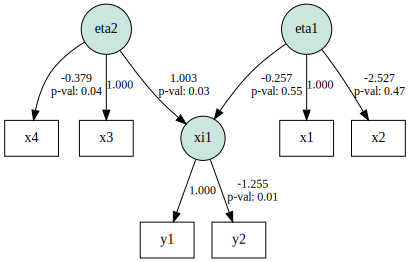

In [32]:
g = semopy.semplot(mod, "pathdiagram.png")
g

#2. Causal Discovery
- 상관관계와 인과관계의 차이:
 - 상관관계는 변수 간 연관성을 보여주지만, 한 변수가 다른 변수에 영향을 준다는 인과적 결론을 의미하지 않음.
 - 정확한 인과 관계를 이해하면 과학 연구, 정책 수립, 비즈니스 전략 등에서 효과적인 의사결정 가능.

- 기존 방법의 한계:
 - 전통적으로 인과 관계를 발견하기 위해 실험(개입 또는 무작위)
 - 비용, 시간 문제로 인해 항상 실현 가능하지 않음.

- 대안적 접근:
 - 구조적 방정식 모델링(SEM)로 데이터 생성 과정의 인과 구조를 가정하여 인과 추론 가능.
 - 인과 그래프는 이러한 추론을 과학적으로 표현하는 틀 제공.
 - 하지만 구조가 완전히 알려지지 않으면 인과 추론 실행에 어려움.
 - 관측된 데이터를 기반으로 인과 구조를 가정하는 인과 발견에 관심 증가.

- Causal Discovery 접근법: Identifiability
- 데이터 생성 과정 중 실제를 나타내는 패턴(인과 그래프)을 추정.
- Causal Graph의 인식 가능함은 관측 변수 분포가 인과 그래프 구조에 따라 항상 다르게 나타나는 것을 의미
- 세 가지 접근법

1. 제약 기반(Constraint-Based) 접근법
- 관찰된 변수 간 조건부 독립성 추론 후, 이를 만족하는 Causal Discovery 탐색.
 - PC 알고리즘: 조건부 독립성에 따라 엣지를 제거하며 진행.
 - FCI 알고리즘: 잠재 변수(혼란 변수) 허용하며 비슷한 방식 적용.
- 다양한 데이터 분포와 인과 관계 처리 가능.
- 조건부 독립성 테스트의 신뢰성과 Faithfulness 가정 요구.

2. 점수 기반(Score-Based) 접근법
- 정의된 점수 함수 최적화를 통해 인과 구조 탐색.
- 여러 후보 그래프 생성 후 점수를 매기고 최적의 그래프 선택.
- 계산 비용이 높으며, Markov 동등 클래스만 추정 가능.

3. 함수적 인과 모델(Functional Causal Model)
- 관찰 변수와 에러 변수의 특정 가정을 통해 인식 가능한 Causal Discovery
- LiNGAM: 선형 함수 형태와 비가우시안 분포 가정으로 인식 가능성
- 그래프가 비순환적(Acyclic)임을 가정.

- Causal Discovery
 - 데이터를 분석하고 변수 간의 인과 관계를 추론함.
 - 데이터 생성의 근본적인 인과 모델을 식별하는 것에 초점.
 - 이 인과 모델은 주로 인과 그래프 형태로 표현됨.

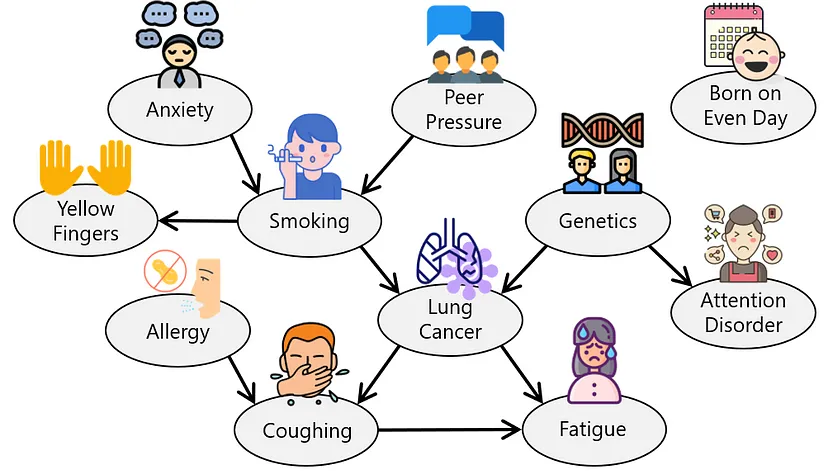

 - 인과 그래프에서 노드는 데이터의 항목(열)을 나타냄.
 - 엣지는 항목 간의 영향을 보여주는 화살표로 표현됨.
 - 예: 기침이 피로를 유발하면 "기침"에서 "피로"로 화살표를 그림.
 - 인과 그래프는 데이터의 인과 관계를 시각적으로 표현함.

1. 인과적 영향 식별:
- 인과 그래프는 특정 결과에 영향을 미치는 변수를 확인하는 데 도움을 줌.
 - 예:"불안"이나 "또래 압력"이 "흡연"을 유발할 수 있음. / "흡연"과 "유전적 요인"이 "폐암"을 유발할 수 있음.
 - 하지만 "특정 날에 태어난 것"은 흡연이나 다른 노드에 인과적 영향을 미치지 않음.
- 이러한 원인-결과 관계를 인과 그래프가 포착함.

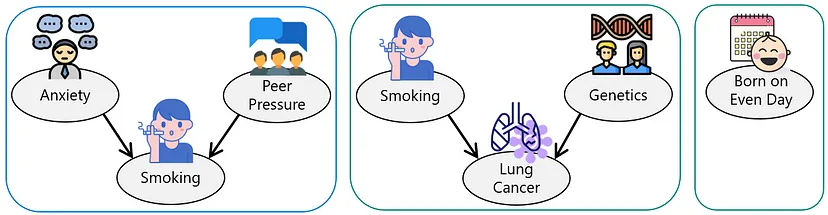

2. 인과 경로 추적:
- 인과 그래프는 인과 경로를 추적하는 데 도움을 줌.
 - 예: "불안" → "흡연" → "폐암" → "기침" 및 "피로"와 같은 증상.
- 이러한 경로를 통해 변수 간의 연결성과 영향을 파악 가능.

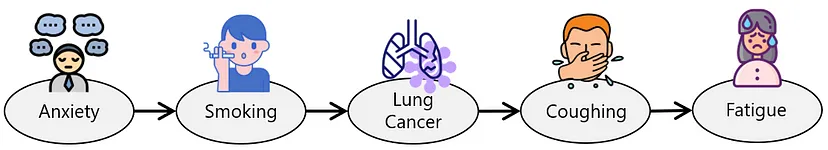

3. 공통 원인 발견:
 - 인과 그래프는 혼란 변수(공통 원인)를 식별하는 데 도움을 줌.
 - 예:"폐암"은 "기침"과 "피로"의 공통 원인(혼란 변수) 역할을 함. 또한 "기침"이 "피로"를 유발할 수도 있음. 피로와 기침이 동시에 발생하면, 이를 유발하는 세 번째 변수(공통 원인)가 있을 가능성 존재.
- 변수 간의 상관관계를 인과관계로 오해하면 안 됨.
 - 예: "폐암" 환자들이 "주의력 장애"를 보이는 경우, 이는 "유전"과 같은 공통 원인 때문일 가능성이 높음. 따라서 폐암 환자가 주의력 장애를 가질 것이라고 단정하는 것은 잘못된 추론임.

## Causal Graph 만들기
- 데이터를 기반으로 인과 그래프를 구성하는 방법을 다룸.
- 다양한 인과 발견 방법이 존재하며, 각각 고유한 가정을 가짐.
- 적절한 방법 선택이 중요함: 데이터의 특성과 해결하려는 문제에 맞아야 함.
- 예제 데이터: https://www.causality.inf.ethz.ch/data/LUCAS.html
- LINGAM 방법 활용(linear non-Gaussian structural equation model)

In [33]:
!pip install gcastle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 3.4 MB/s eta 0:00:00


In [1]:
from castle.algorithms import PC
import numpy as np

In [2]:
import pandas as pd
X = pd.read_csv("data.csv", index_col=0)
X

,x2,x3,x4,y1,y2
x1,,,,,
10,8,9,8,9,5
8,6,8,7,8,7
7,7,9,6,6,6
9,9,6,8,4,9
5,10,7,8,8,8
10,8,9,8,9,5
8,6,8,7,8,7
7,7,9,6,6,6
9,9,6,8,4,9


In [3]:
# PC 알고리즘 적용
model = PC()
model.learn(X.values)

In [4]:
import networkx as nx
arr = model.causal_matrix
g = nx.from_numpy_array(arr,create_using=nx.DiGraph, nodelist=X.columns)

In [5]:
node_sizes = [g.degree()[node] * 50 for node in g.nodes()]

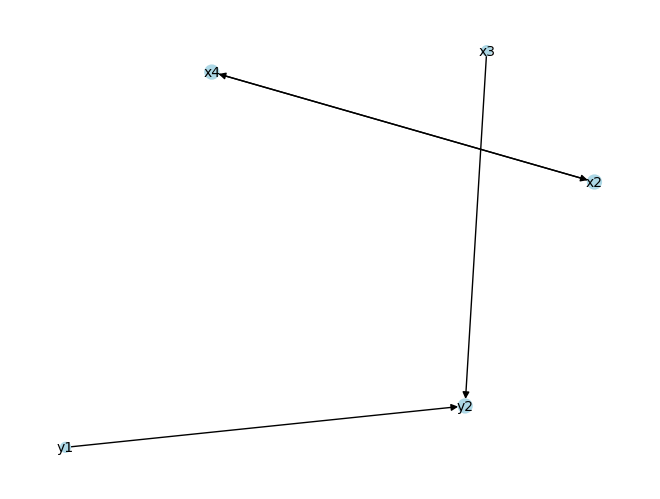

In [6]:
nx.draw(g, pos = nx.kamada_kawai_layout(g), with_labels=True, node_color='lightblue', node_size=node_sizes, font_size=10)

### LiNGAM(Linear Non-Gaussian Acyclic Model)
- LiNGAM의 기본 개념
- 선형 구조 방정식 기반.
- error는 non-gaussian 분포를 따름.
- 그래프는 비순환적.
- LiNGAM의 추정 방법
 - 독립 성분 분석(ICA): 데이터 생성 과정을 독립 성분으로 분리하여 구조 추정. 선형성 및 비가우시안성 가정 활용.
 - 직접 추정법(Direct Method): 변수 간 선형 회귀와 독립성 평가 반복.올바른 인과 순서에서만 에러 변수와 설명 변수 독립.

In [40]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but y

In [7]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

X = pd.read_csv('lucas0_train.csv')
X.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1


In [8]:
model = lingam.DirectLiNGAM()
model.fit(X)

In [9]:
model.adjacency_matrix_

array([[ 0.   ,  0.81 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.458,  0.   ,  0.   , -0.059,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.164,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.362,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.275,  0.   ,  0.   ,
         0.461,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   , 

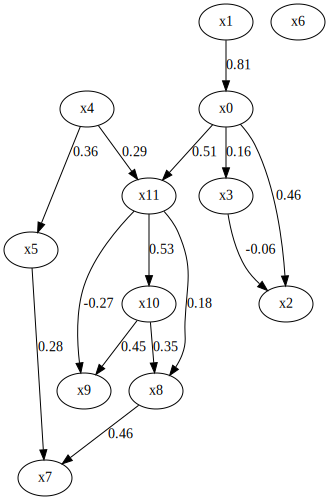

In [10]:
make_dot(model.adjacency_matrix_)

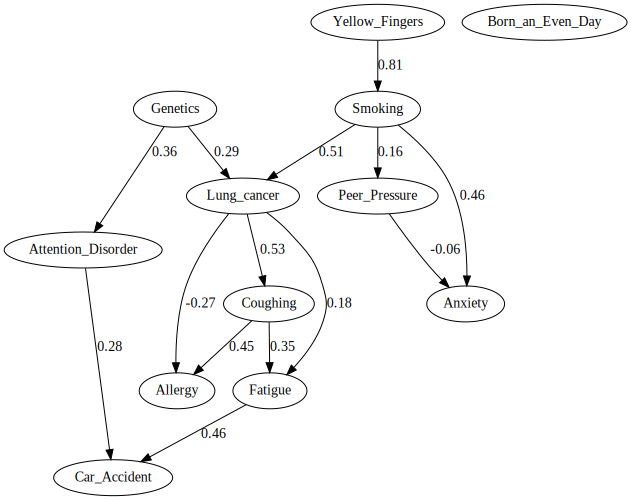

In [11]:
make_dot(model.adjacency_matrix_, labels=list(X.columns))

In [12]:
model.causal_order_

[4, 1, 0, 3, 11, 2, 5, 10, 8, 7, 9, 6]

In [13]:
X.columns

Index(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics',
       'Attention_Disorder', 'Born_an_Even_Day', 'Car_Accident', 'Fatigue',
       'Allergy', 'Coughing', 'Lung_cancer'],
      dtype='object')

In [14]:
model.estimate_total_effect(X, 0, 2)

0.45379552442192245

- 단순한 예

In [15]:
adv = pd.read_csv("adv.csv")

In [16]:
model1 = lingam.DirectLiNGAM()
model1.fit(adv)

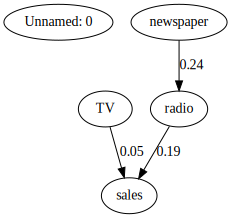

In [17]:
make_dot(model1.adjacency_matrix_, labels=list(adv.columns))

#3. Causal ML: Causal Discovery + ML
- 최근 몇 년간 인과 추론과 머신러닝을 결합한 알고리즘이 주목받고 있음.
- 예: Uplift 모델링: 고객 타겟팅에 효과적인 기법임.
- Uplift 모델링?
 - Uplift 모델링은 특정 개입(예: 마케팅 캠페인, 약물 치료)의 효과를 예측.
 - 기존 모델이 단순히 결과를 예측하는 것과 달리, Uplift 모델은 개입이 없는 경우와 비교한 변화량을 추정.
 - 마케팅: 특정 고객이 프로모션을 통해 구매 확률이 얼마나 증가할지 예측.


  - 특정 처리(treatment) (예: 마케팅 제안)를 받을 경우 구매 가능성이 높아지는 고객을 식별하는 데 기여
  - targeted by treatment   VS not targeted by trmt.
   - 구매 가능성의 차이를 분석
   - 비용 집약적인 마케팅 캠페인에서 특히 유용

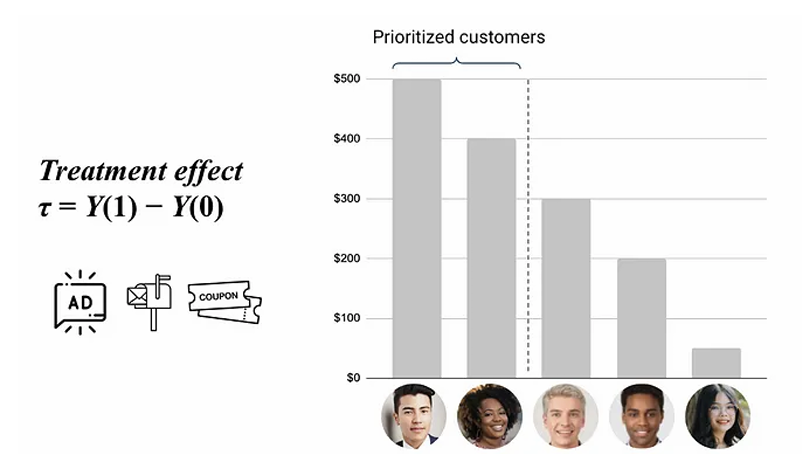

- 네 가지 유형의 타겟
1. Persuadables: trement를 받은 경우 구매할 가능성이 높은 대상, 업리프트 모델링의 주요 그룹
2. Sure Things: treatment와 상관없이 구매할 그룹
3. Lost Causes: treatment를 받아 target되어도 구매하지 않는 그룹
4. Sleeping Dogs: treatment를 받으면 덜 구매할 그룹

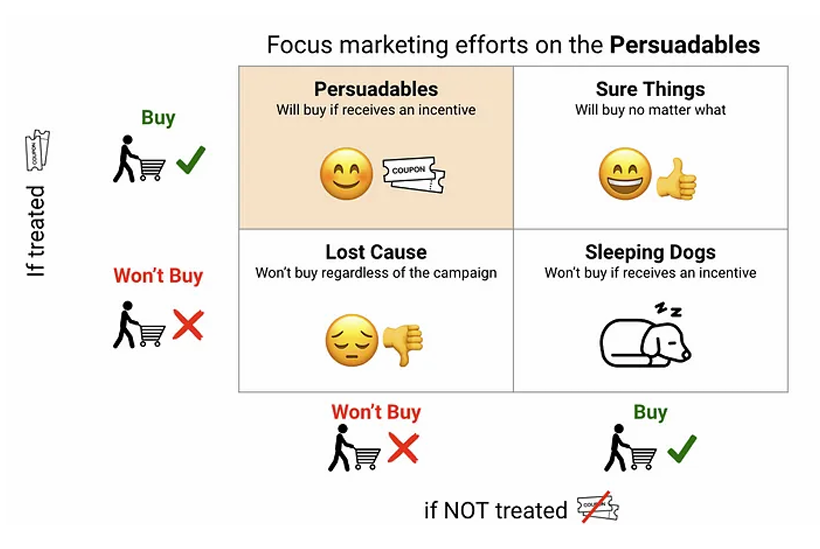

### 업리프트 모델링의 두 가지 접근법
1. Meta-Learners: customer를 추정된 treatment effect로 정렬(내림차순)하여 target대상을 발견함

2. Tree-Based Methods: Decision Tree를 사용하여 업리프트 모델링
 - Uplift Trees, Uplift Random Forests
 - 장점: multiple treatment groups을 동시에 처리, 예를 들어, 할인율 하나를 분석하는 대신, 여러 할인율( 5%, 10%,  20% )을 동시에 비교

In [18]:
! pip install causalml scikit-uplift

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00


In [19]:
 # Import necessary libraries
import numpy as np
import pandas as pd
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain, plot_qini
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import importlib


ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [20]:
from IPython.display import display
 # Ensure the required libraries are installed
print(importlib.metadata.version('causalml'))

0.15.4


 - Criteo dataset: 약 1300만 샘플 by Criteo AI Lab.
 - Features Description:
 - f0 to f11: Feature values (dense, float)
 - treatment: Treatment group (1 = treated, 0 = control)
 - conversion: 컨버전 발생 여부 (binary, label)
 - visit: 방문 발생 여부 (binary, label)
 - exposure: Treatment 노출 여부 (binary)
 - 아래 예에서는 treatment와 conversion을 사용

- Source: “A Large Scale Benchmark for Uplift Modeling”
 - Eustache Diemert, Artem Betlei, Christophe Renaudin; (Criteo AI Lab), Massih-Reza Amini (LIG, Grenoble INP)
 - https://ailab.criteo.com/criteo-uplift-prediction-dataset

In [21]:
from sklift.datasets import fetch_criteo
X, y, treatment = fetch_criteo(target_col='conversion', treatment_col='treatment', percent10=True,  return_X_y_t=True)
df = X.copy()
df['conversion'] = y.astype('int64')
df['treatment'] = treatment.astype('object').replace({0: 'control', 1: 'treatment'})
df.head()
# df['user_id'] = df.index

Criteo dataset (10 percent):   0%|          | 0.00/32.0M [00:00<?, ?iB/s]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,conversion,treatment
0,26.290533,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,treatment
1,12.616365,10.059654,8.339021,4.679882,10.280525,4.115453,0.294443,4.833815,3.869313,32.101873,5.300375,-0.168679,0,control
2,17.293231,10.059654,8.214383,2.293959,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,0,treatment
3,12.616365,10.059654,8.788121,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,13.190056,5.300375,-0.168679,0,control
4,20.363292,10.059654,8.563419,2.934780,10.280525,4.115453,-12.570178,4.833815,3.863287,18.380112,5.300375,-0.168679,0,treatment


### 3.1. Meta-Learner 활용

- 두 그룹에 대한 컨버전 비율 비교
 - Treatment Group: 0.31%  (광고 본 사람 중 구매한 비율)
 - Control Group: 0.19% (광고 안 본 사람 중 구매한 비율)
 - 두 비율의 차이를 통해서 광고의 효과를 측정? 디지털 광고의 타겟팅의 특성 상 정확하지 않을 수 있음

In [25]:
# Conversion and conversion rate by treatment group
treatment_group = df[df['treatment'] == 'treatment']
control_group = df[df['treatment'] == 'control']

# Number of users and conversion rate in treatment group
treatment_converted = treatment_group['conversion'].sum()
treatment_total = len(treatment_group)
treatment_conversion_rate = treatment_converted / treatment_total

# Number of users and conversion rate in control group
control_converted = control_group['conversion'].sum()
control_total = len(control_group)
control_conversion_rate = control_converted / control_total

# Create a summary table
summary_table = pd.DataFrame({
    '': ['Total Users', 'Converted Users', 'Conversion Rate (%)'],
    'Treatment Group': [treatment_total, treatment_converted, f"{treatment_conversion_rate * 100:.2f}%"],
    'Control Group': [control_total, control_converted, f"{control_conversion_rate * 100:.2f}%"]
})
display(summary_table)

# Difference in conversion rate
conversion_rate_difference = treatment_conversion_rate - control_conversion_rate
conversion_rate_difference

,,Treatment Group,Control Group
0,Total Users,1188267,209693
1,Converted Users,3671,406
2,Conversion Rate (%),0.31%,0.19%


0.0011532091908422353

- Calculating ATE with Meta Learners
 - meta learner 방식:CausalML의 XGBT regressor 활용
 - Average Treatment Effect (ATE)
 - 추정된 ATE: 0.10% ( 0.12% 보다 낮음), 광고와 상관없이 구매한 고객들에 의한 차이

In [23]:
from causalml.inference.meta import XGBTRegressor

# Initialize and fit the T-Learner with XGBoost
learner_t = XGBTRegressor()
learner_t.fit(X=X.values, treatment=treatment.values, y=y.values)

# Predict the treatment effect and calculate the Average Treatment Effect (ATE)
treatment_effect = learner_t.predict(X=X.values)
ate = treatment_effect.mean()

# Output the estimated ATE as a percentage
print(f"Estimated ATE: {ate * 100:.2f}%")

Estimated ATE: 0.09%


- 관측된 Conversion Rates의 분해
 - 위의 차이에 대해 설명
 - 단순 컨버전비율은 ATE와 selection bias로 구분

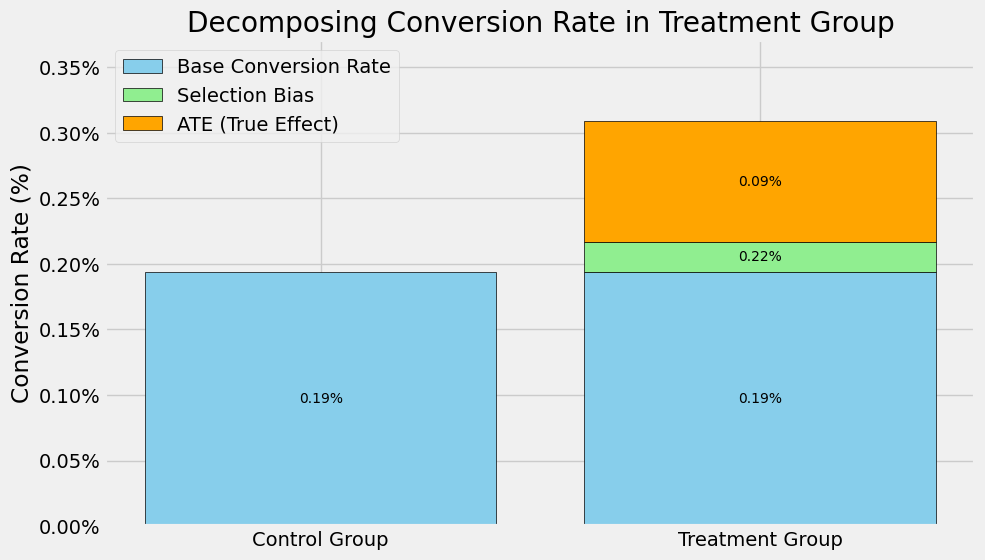

In [24]:
selection_bias = treatment_conversion_rate - ate

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for Treatment Group
base_conversion = control_conversion_rate
selection_bias_height = selection_bias - control_conversion_rate
ate_height = ate

# Create the bar plot
ax.bar('Control Group', control_conversion_rate, color='skyblue', edgecolor='black', label='Base Conversion Rate')
ax.bar('Treatment Group', base_conversion, color='skyblue', edgecolor='black')  # No label to avoid duplication
ax.bar('Treatment Group', selection_bias_height, bottom=base_conversion, color='lightgreen', edgecolor='black', label='Selection Bias')
ax.bar('Treatment Group', ate_height, bottom=base_conversion + selection_bias_height, color='orange', edgecolor='black', label='ATE (True Effect)')

# Adding text labels for each segment
ax.text(0, control_conversion_rate / 2, f'{control_conversion_rate * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)
ax.text(1, base_conversion / 2, f'{base_conversion * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)
ax.text(1, base_conversion + selection_bias_height / 2, f'{selection_bias * 100:.3f}%', ha='center', va='center', color='black', fontsize=10)
ax.text(1, base_conversion + selection_bias_height + ate_height / 2, f'{ate * 100:.2f}%', ha='center', va='center', color='black', fontsize=10)

# Customizing plot
ax.set_ylim(0, treatment_conversion_rate * 1.2)
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Decomposing Conversion Rate in Treatment Group')

# Adding legend
ax.legend()

# Format y-axis to show percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}%'.format(y * 100)))

plt.show()

### 3.2. Tree-based methods

- 기존 DT와의 비교
 - DT: 각 customer가 물건을 구매할 것인지를 예측
 - uplift tree: "어느 그룹에 target해서 쿠폰을 줘야 하는지?"에 대한 답변, treated와 untreated 고객들을 구분하여, 잠재적인 uplift를 찾고자 함

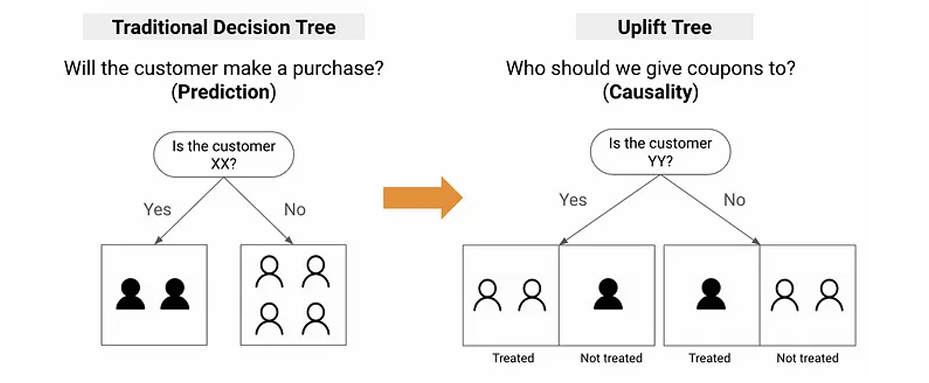

- 기존 DT: Impurity 등을 활용하여 split rule을 선택

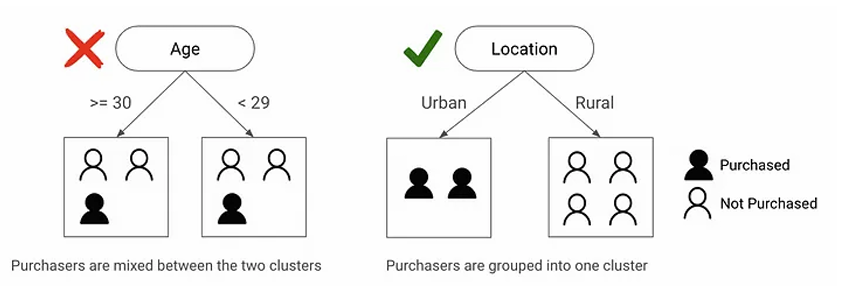

- uplift tree: “Who should we give coupons to?” 에 대한 답변을 찾으려고 함.
 - 목적: 쿠폰 등 trmt를 받은 그룹과 받지 않은 그룹간의 구매율을 최대한 구분
 - treated 그룹과 아닌 그룹을 나눠서 분석
 - 아래 두 uplift tree의 예: 우측이 더 나은 split

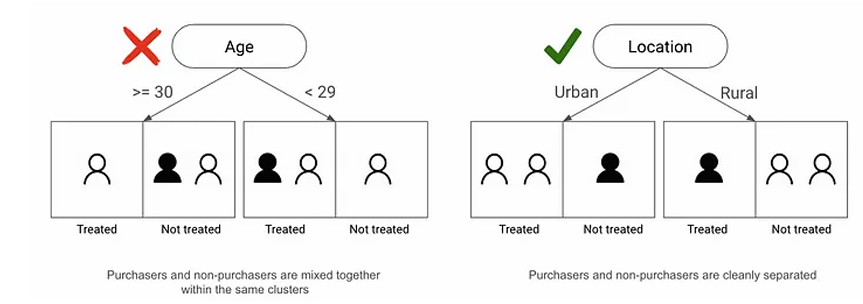

- split criteria는 어떻게?
 - divergence metrics 유형을 사용: Kullback
Leibler (KL) Divergence, 또는 Euclidean Distance
 - 예를 들어, Squared Euclidean Distance를 사용
 - Squared Euclidean Distance = (P(0) — Q(0))² + P(1) — Q(1))²
 -  P(1)과 Q(1): treatment 그룹에서의 구매확율 및 구매하지 않을 확률
 -  P(0)과 Q(0): treatment를 받지 않은 control 그룹에서 구매 확률과 구매하지 않을 확률

 - 좌측 uplift tree의 divergence

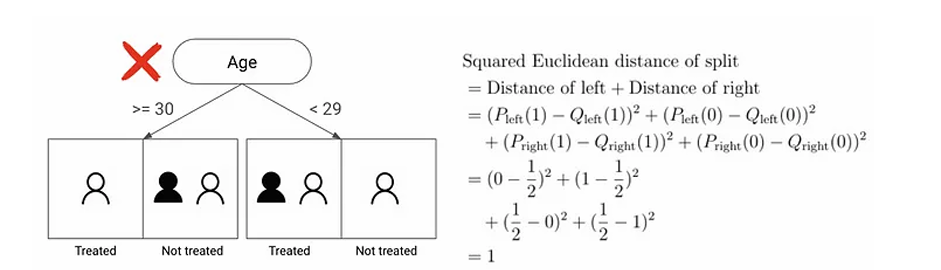

 - 우측 uplift tree의 divergence

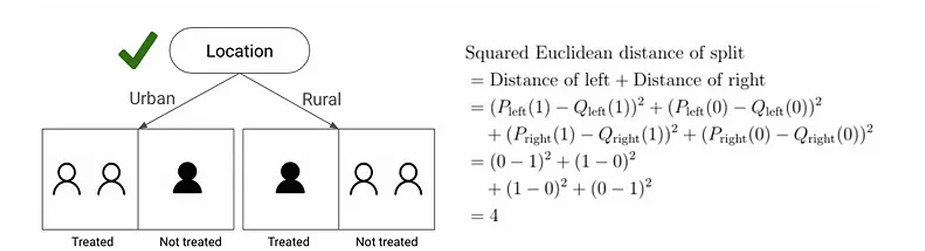

###3.3 CausalML 활용: 마케팅 예제 데이터

In [26]:
! pip install causalml scikit-uplift

In [27]:
 # Import necessary libraries
import numpy as np
import pandas as pd
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain, plot_qini
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from IPython.display import display
 # Ensure the required libraries are installed
print(importlib.metadata.version('causalml'))

0.15.4


In [28]:
from sklift.datasets import fetch_criteo
X, y, treatment = fetch_criteo(target_col='conversion', treatment_col='treatment', percent10=True,  return_X_y_t=True)
df = X.copy()
df['conversion'] = y.astype('int64')
df['treatment'] = treatment.astype('object').replace({0: 'control', 1: 'treatment'})
df.head()
# df['user_id'] = df.index

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,conversion,treatment
0,26.290533,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,treatment
1,12.616365,10.059654,8.339021,4.679882,10.280525,4.115453,0.294443,4.833815,3.869313,32.101873,5.300375,-0.168679,0,control
2,17.293231,10.059654,8.214383,2.293959,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,0,treatment
3,12.616365,10.059654,8.788121,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,13.190056,5.300375,-0.168679,0,control
4,20.363292,10.059654,8.563419,2.934780,10.280525,4.115453,-12.570178,4.833815,3.863287,18.380112,5.300375,-0.168679,0,treatment


-  imbalance data set: 약 85%가 광고에 노출 (treated), 15% 는 노출되지 않음 (control group)

In [29]:
print('Total number of samples: {}'.format(len(df)))

Total number of samples: 1397960


In [30]:
df['treatment'].value_counts(normalize = True)

,proportion
treatment,
treatment,0.850001
control,0.149999


In [31]:
df['conversion'].value_counts(normalize = True)

,proportion
conversion,
0,0.997084
1,0.002916


In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
df.drop(columns = ['conversion', 'treatment']), df['conversion'], df['treatment'],
test_size=0.3, random_state=42)

In [33]:
# Train Uplift Random Forest model
uplift_rf = UpliftRandomForestClassifier(control_name='control')
uplift_rf.fit(X_train.values, treatment=treatment_train.values, y=y_train.values)

In [34]:
# Predict uplift using the trained model
y_pred = uplift_rf.predict(X_test)

In [35]:
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

# Specify a tree in the random forest (the index can be any integer from 0 to n_estimators-1)
uplift_tree = uplift_rf.uplift_forest[0]

# Print uplift tree as a string
result = uplift_tree_string(uplift_tree.fitted_uplift_tree, X_train.columns)

f5treatment_group_key >= 3.01306434186306?
yes -> f3treatment_group_key >= 1.267425111535997?
		yes -> f2treatment_group_key >= 8.818293290919009?
				yes -> f6treatment_group_key >= -13.583126341272685?
						yes -> [0.0, 0.0005116483049158106]
						no  -> [0.002531645569620253, 0.0017200602021070737]
				no  -> f2treatment_group_key >= 8.746403280495871?
						yes -> [0.0, 0.0011920103092783506]
						no  -> [0.0015673385641278947, 0.001980681157775063]
		no  -> f11treatment_group_key >= -0.3373584420011225?
				yes -> f6treatment_group_key >= -18.7645691431628?
						yes -> [0.0029269972451790634, 0.011244784045954588]
						no  -> [0.0, 0.03995953464845726]
				no  -> f9treatment_group_key >= 49.94680559699326?
						yes -> [0.6333333333333333, 0.40131578947368424]
						no  -> [0.1134020618556701, 0.26688102893890675]
no  -> f7treatment_group_key >= 10.999368125603864?
		yes -> f5treatment_group_key >= 0.3463602638335841?
				yes -> f0treatment_group_key >= 12.681863805170035?
		

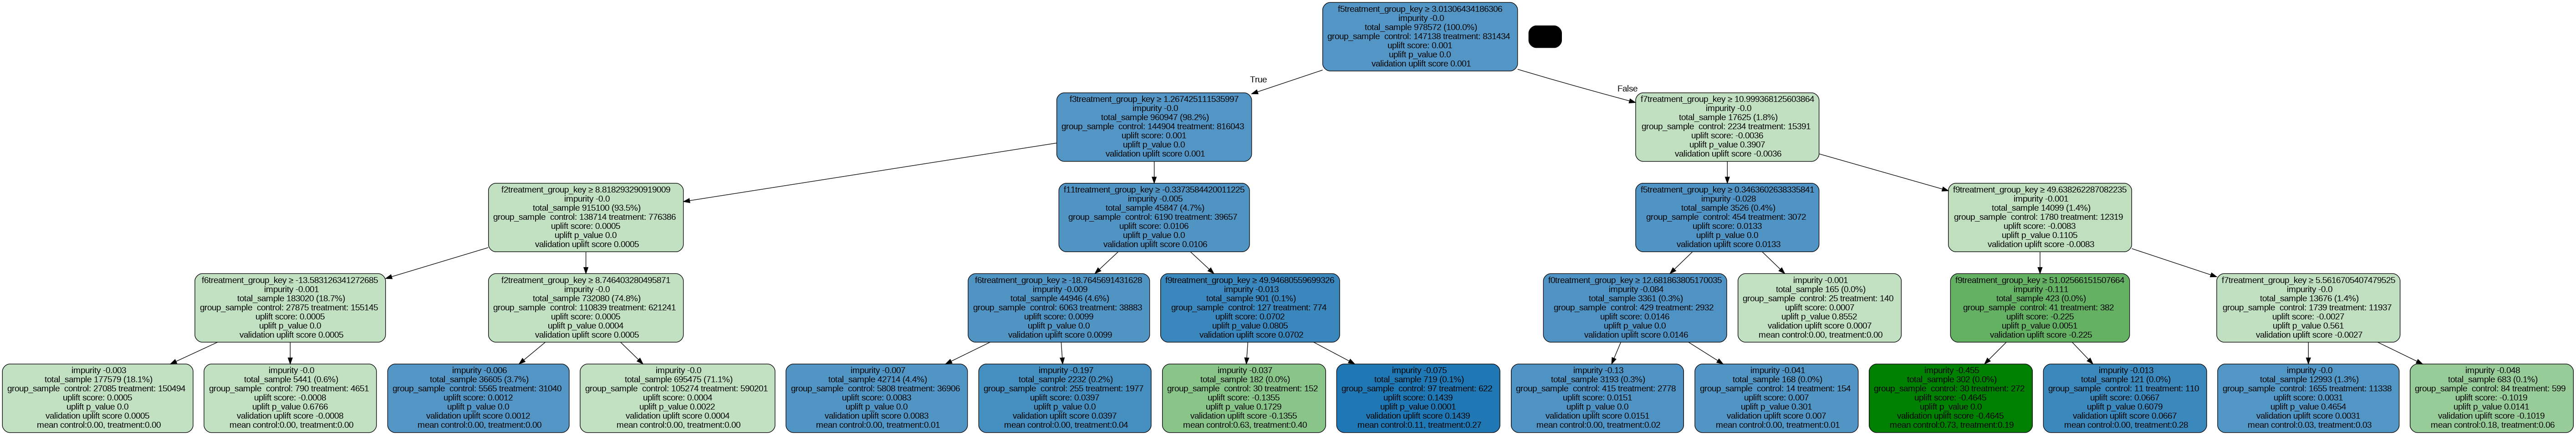

In [36]:
# Plot uplift tree
from IPython.display import Image
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree, X_train.columns)
Image(graph.create_png())

In [37]:
# Plotting the feature importance of the uplift tree
pd.Series(uplift_tree.feature_importances_, index = X_train.columns).sort_values()

,0
f1,0.000000
f4,0.000000
f8,0.000000
f10,0.000000
f3,0.027467
f7,0.073201
f0,0.073767
f9,0.092901
f11,0.097295
f5,0.123061


<Axes: >

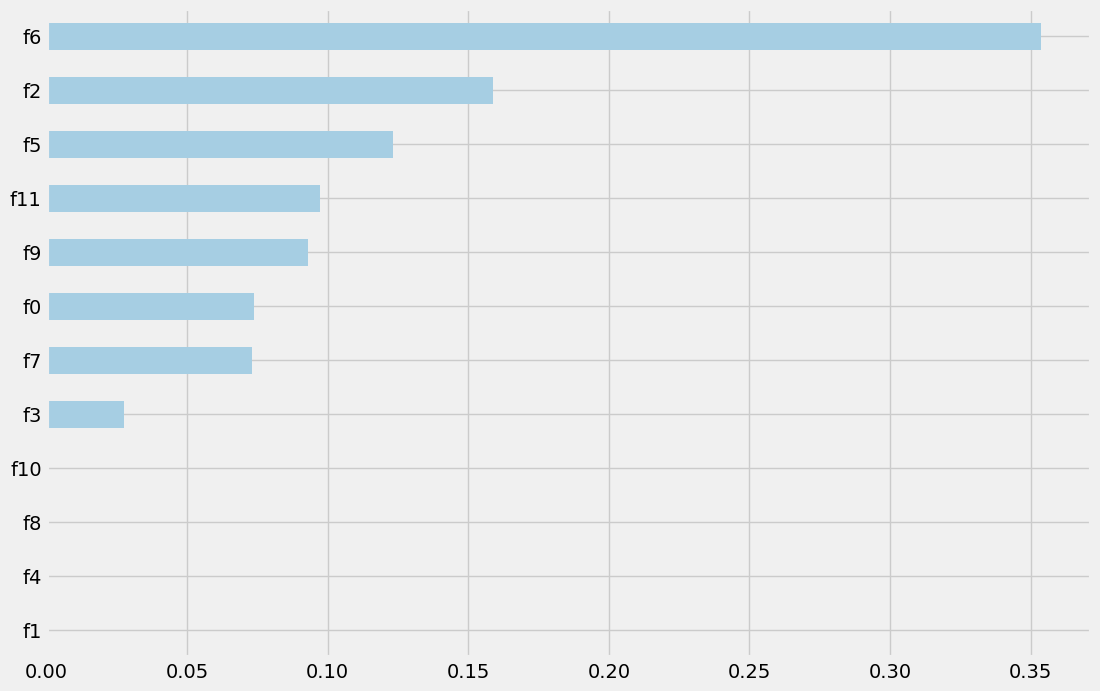

In [38]:
# Plotting the feature importance of the uplift tree
pd.Series(uplift_tree.feature_importances_, index = X_train.columns).sort_values().plot(kind='barh', figsize=(12,8))

-  is_treated, conversion, uplift 컬럼을 생성
 - Positive uplift 점수: treatment가 효과적임을 보여줌

In [39]:
uplift_results = pd.DataFrame(y_pred, columns=uplift_rf.classes_[1:])

best_treatment = np.where(uplift_results['treatment'] < 0, 'control', 'treatment')

auuc_metrics = (uplift_results.assign(is_treated=(treatment_test.values != 'control').astype(int),
                              conversion=pd.concat([X_test, y_test, treatment_test], axis=1)['conversion'].values,
                              uplift=uplift_results.max(axis=1))
                .drop(columns=list(uplift_rf.classes_[1:])))

# Print AUUC metrics DataFrame
print("AUUC metrics DataFrame:")
display(auuc_metrics)

AUUC metrics DataFrame:


,is_treated,conversion,uplift
0,1,0,0.001196
1,1,0,0.000058
2,1,0,0.001106
3,0,0,0.000737
4,0,0,0.000259
...,...,...,...
419383,1,0,0.000540
419384,1,0,0.000485
419385,1,0,0.000234
419386,1,0,0.001267


- Uplift Curve: Total Cumulative Gain
 - treatment로 얼마나 효과적으로 컨버전되었는지를 보여줌
 - 하늘색 곡선: 업리프트 모델링 결과, 파란선: 랜덤한 결과
 - 예: 전체의 20%에 타겟팅한 결과는 모두에 대해 타겟팅한 결과의 80%수준
 - 두 선 사이 영역: AUUC, Area Under the Uplift Curve score.

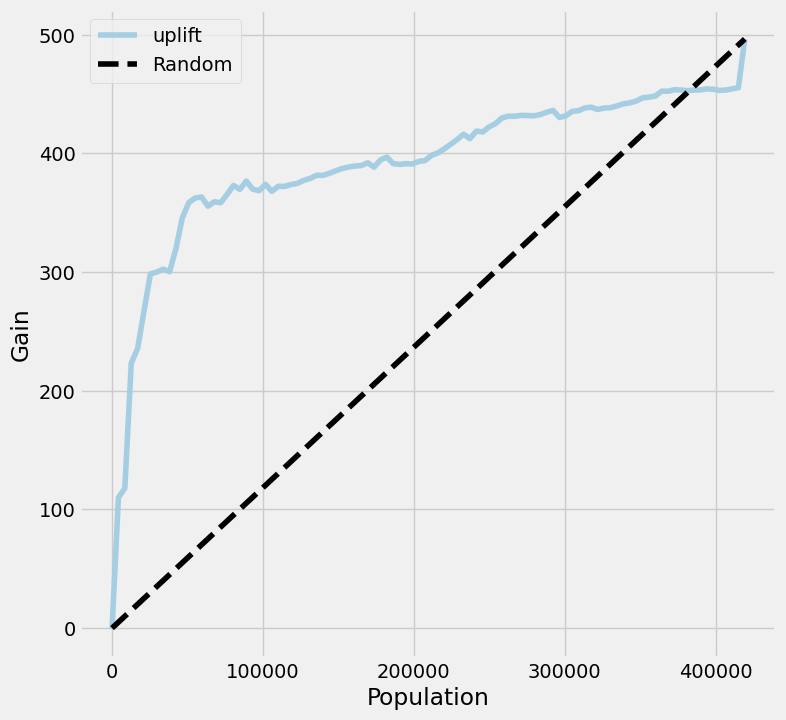

In [40]:
# Plot the uplift curve (AUUC: area under uplift curve)
plot_gain(auuc_metrics, outcome_col='conversion', treatment_col='is_treated')

In [41]:
from causalml.metrics import auuc_score
score = auuc_score(auuc_metrics, outcome_col='conversion', treatment_col='is_treated')
print(score)

uplift    0.789093
dtype: float64


- Targeted Users 추출: 업리프트 점수에 의해 타겟팅할 대상 추출

In [42]:
# Sort the uplift_results DataFrame by 'uplift' in descending order
uplift_results['user_id'] = X_test.index
uplift_results.rename(columns={'treatment': 'uplift'}, inplace=True)
uplift_results_sorted = uplift_results.sort_values(by='uplift', ascending=False).reset_index(drop=True)

# Print the customer list
print("Customer List Sorted by Uplift:")
display(uplift_results_sorted[['user_id', 'uplift']].head(10))

Customer List Sorted by Uplift:


,user_id,uplift
0,1365906,0.080766
1,252467,0.067640
2,42787,0.067582
3,445009,0.067067
4,716746,0.059490
5,1304633,0.059490
6,699280,0.059490
7,1287177,0.059490
8,414253,0.059490
9,93498,0.058968
